In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sms_spam.csv', encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]

# Convert labels to binary variables


In [ ]:
df['label'] = df['label'].replace('ham', 0)
df['label'] = df['label'].replace('spam', 1)

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
# plt.title("Spam vs Ham")
# plt.legend(["Ham", "Spam"])
# plt.show()

# Split the data into training and testing sets


In [ ]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer object


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=True, stop_words='english')

# Fit the training data and transform both the training and testing data


In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Get the feature names


In [ ]:
feature_names = vectorizer.get_feature_names_out()

# Train a Naive Bayes classifier


In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions_nb = naive_bayes.predict(X_test)

# Train a Logistic Regression classifier


In [ ]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
predictions_lr = logistic_regression.predict(X_test)

# Evaluate the models


In [ ]:
accuracy_nb = accuracy_score(y_test, predictions_nb)
accuracy_lr = accuracy_score(y_test, predictions_lr)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_nb)
print("Logistic Regression Accuracy:", accuracy_lr)

Naive Bayes Accuracy: 0.9838565022421525
Logistic Regression Accuracy: 0.9775784753363229


# Visualize the spam keywords using a wordcloud


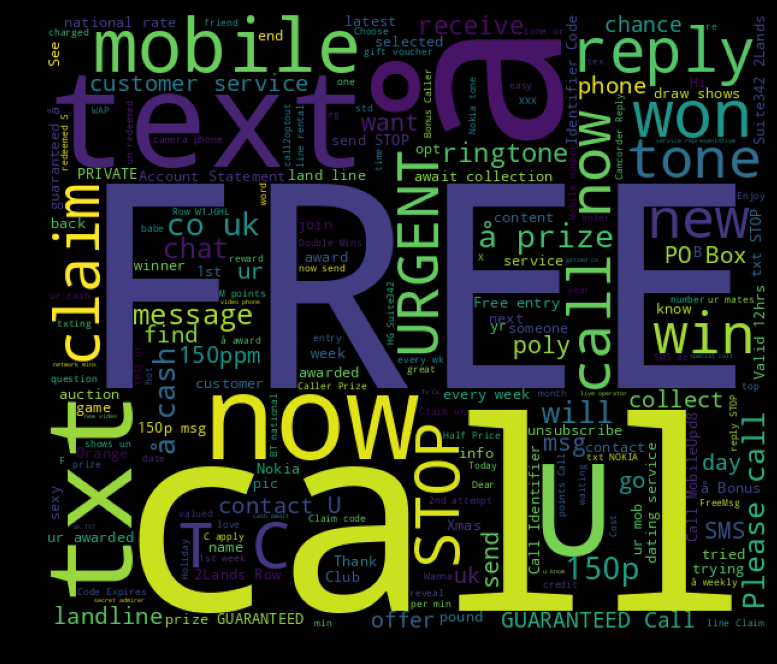

In [ ]:
spam_words = ' '.join(df[df['label'] == 1]['message'])
spam_wc = WordCloud(width=600, height=512).generate(spam_words)
plt.figure(figsize=(12, 8), facecolor='k')
plt.imshow(spam_wc)
plt.show()

# Check with an example input


In [ ]:
# Test the models with a new input
# new_input = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075"
new_input=input()

# Transform the new input using the CountVectorizer
new_input_transformed = vectorizer.transform([new_input])

# Make predictions using the Naive Bayes and Logistic Regression models
prediction_nb = naive_bayes.predict(new_input_transformed)
prediction_lr = logistic_regression.predict(new_input_transformed)

# ham - 0
# spam - 1

print("Naive Bayes Prediction:", prediction_nb)
print("Logistic Regression Prediction:", prediction_lr)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075
Naive Bayes Prediction: [1]
Logistic Regression Prediction: [1]
